In [ ]:
# !pip install SMOTE

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# !pip install -U scikit-learn imbalanced-learn

In [1]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.7/99.8 MB 11.9 MB/s eta 0:00:09
    --------------------------------------- 2.1/99.8 MB 19.4 MB/s eta 0:00:06
   - -------------------------------------- 3.9/99.8 MB 24.7 MB/s eta 0:00:04
   -- ------------------------------------- 5.7/99.8 MB 27.8 MB/s eta 0:00:04
   --- ------------------------------------ 7.5/99.8 MB 30.1 MB/s eta 0:00:04
   --- ------------------------------------ 9.5/99.8 MB 31.8 MB/s eta 0:00:03
   ---- ----------------------------------- 11.4/99.8 MB 38.5 MB/s eta 0:00:03
   ----- ---------------------------------- 13.4/99.8 MB 40.9 MB/s eta 0:00:03
   ----- ---------------------------------- 14.9/99.8 MB 38.6 MB/s eta 0:00:03
   ------ --------------------------------- 16.5/99.8 MB 38.6 MB/s eta 0:00:03
   ------- -------------------------------- 17.9/99.8 MB 36.4 MB/s et

In [3]:
# pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install numpy

In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [ ]:
# pip install transformers

In [ ]:
# pip install nltk

In [ ]:
# import nltk

In [ ]:
# nltk.download('stopwords')

In [ ]:
# nltk.download('punkt')

In [ ]:
# nltk.download('wordnet')

In [4]:
#  pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.6 MB 5.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   --------------------------------------- 491.3/491.3 kB 30.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
   ---------------------------------------- 200.5/200.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# import keras.preprocessing.text Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import xgboost as xgb
from gensim.models import KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import HashingVectorizer
# import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.preprocessing import Normalizer
from gensim.models import KeyedVectors
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from gensim.models import KeyedVectors
import random
import tensorflow as tf
import os
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

In [7]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [8]:
train.describe()

,overall
count,370863.000000
mean,4.566600
std,0.930377
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
def preprocess(text):
    pattern = r"[^\w\s]"
    text = [''.join([char if char.isalnum() else ' ' for char in word]) for word in text.split()]
    text = ' '.join(text)
    text =  re.sub(pattern," ",text)
     # used word_tokenize function to tokenize the text, gives list

    tokenized_text = word_tokenize(text.lower())
    # get the stop words
    stop_words = set(stopwords.words('english'))
    # removed stop words
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    # applying stemming
    # stemmer = PorterStemmer()
    # tokenized_text = [stemmer.stem(word) for word in tokenized_text]
    # applying lemmatization
    lemmatizer = WordNetLemmatizer()
    tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]

    preprocessed_text = ' '.join(tokenized_text)

    return preprocessed_text

In [10]:
def reset_random_seeds(SEED=42):
   os.environ['PYTHONHASHSEED']=str(SEED)
   tf.random.set_seed(SEED)
   np.random.seed(SEED)
   random.seed(SEED)
reset_random_seeds(SEED=42)

In [11]:
train.head(20)

,overall,Review
0,5,I love these glitter pens. They sparkle deligh...
1,5,It works well with my machine. I use mostly c...
2,5,"This is a great assortment of colors, though t..."
3,5,Just what I was looking for.
4,5,I make 400 birds for the hospital each month.
5,1,not very sharp
6,5,Its just a replacement blade
7,5,"Great value,"
8,3,It is just okay for me. The plastic is a bit ...
9,5,Always happy when I find a great priced art gi...


In [12]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [13]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [14]:
train.duplicated().sum()

93449

In [15]:
train = train.drop_duplicates()

In [16]:
train.shape

(277414, 2)

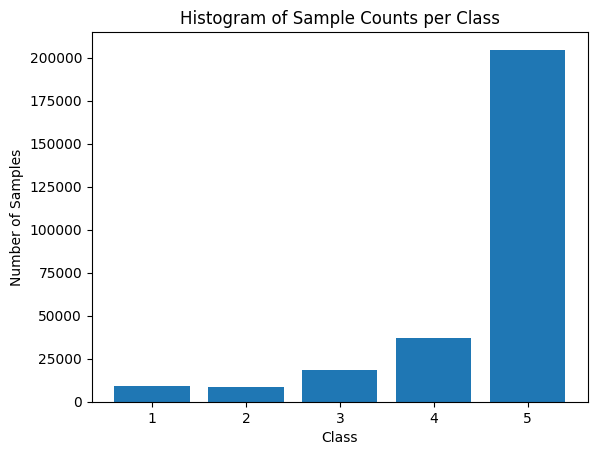

In [17]:
class_counts = train['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

In [18]:
test.describe()

,id
count,123622.000000
mean,61810.500000
std,35686.741826
min,0.000000
25%,30905.250000
50%,61810.500000
75%,92715.750000
max,123621.000000


In [19]:
test.head(20)

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...
5,5,Great idea but they don't cut well
6,6,Love this thread.
7,7,GOOD REUSABLE PRODUCT. MADE BAR LOTION WITH T...
8,8,After trial and error with various brands of a...
9,9,They are really smelly - like a vinyl shower c...


In [20]:
test.isnull().sum()

id        0
Review    4
dtype: int64

In [21]:
test.duplicated().sum()

0

In [22]:
test.shape

(123622, 2)

In [23]:
train["Review"]= train["Review"].astype(str)


In [24]:
train["Review"] = train["Review"].apply(preprocess)

In [25]:
train

,overall,Review
0,5,love glitter pen sparkle delightfully page bri...
1,5,work well machine use mostly cone
2,5,great assortment color though lot pink mix sti...
3,5,looking
4,5,make 400 bird hospital month
...,...,...
370856,5,perfect application bottle dispensing powdered...
370857,4,mainly purchased roll pencil case going gift s...
370858,5,love dy make great background card
370859,5,love darice embossing folder darcie folder rea...


In [26]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.3, random_state=42)
print('Original class distribution:', Counter(y_train))

Original class distribution: Counter({5: 143171, 4: 25754, 3: 12802, 1: 6567, 2: 5895})


In [27]:
X_train.shape

(194189,)

In [28]:
def create_pipeline(classifiers,vectorizer, normalizer=None, reduction= False, feature_selection=True,k=1000,balancing=False ):
     # start building the pipeline, first step -> vectorization
    step =[("vectorizer",vectorizer)]
     # if dimensionality reduction is requested add a TruncatedSVD step to the pipeline
    if normalizer:
        step.append(("normalizer",normalizer))
    # if feature selection is requested add a SelectKBest step to the pipeline
    if feature_selection:
        step.append(('feature_selection', SelectKBest(chi2, k=k)))
    # add the classifier to the pipeline
    step.append(("classifier",classifiers))

        # pipeline object with the steps prepared above and assign it to the corresponding classifier name in the models dict
    models = Pipeline(step)
    return models

## Logistic Regression

### Comparing Ngram Features

#### Unigram

In [29]:
def logistic_hyperparameter(ngram):
    space = {
        'C': hp.loguniform('C', np.log(0.01), np.log(10)),
        'penalty': hp.choice('penalty', ['l2']),
        'k':hp.choice('k', np.arange(8000, 35000, 1000, dtype=int)),
        'class_weight': hp.choice('class_weight', ['balanced', {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}]),
        'solver': hp.choice('solver',['newton-cg', 'lbfgs', 'liblinear','saga']),
        'max_iter': hp.choice('max_iter',np.arange(1000, 8000, 500, dtype=int))
    }

    def objective(params):
        k = params.pop('k')
        classifier = LogisticRegression(**params)
        vectorizer = TfidfVectorizer(ngram_range=ngram)
        
        model = create_pipeline(classifier, vectorizer, feature_selection=True, k=k)
        score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
        print(f"\nTrial completed:")
        print(f"Params: {params} features:{k}")
        print(f"Accuracy: {score}, Loss: {-score}")
        return {'loss': -score, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials)
    logistic = best
    print("Best hyperparameters:", best)
    return logistic

In [30]:
best_uni = logistic_hyperparameter((1,1))

                                                      
Trial completed:
Params: {'C': 5.772388108015175, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'} features:26000
Accuracy: 0.6160132724403082, Loss: -0.6160132724403082
  2%|▏         | 1/50 [01:34<1:17:02, 94.33s/trial, best loss: -0.6160132724403082]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                   
Trial completed:
Params: {'C': 0.41794305812496335, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'} features:10000
Accuracy: 0.6218016989072903, Loss: -0.6218016989072903                            
                                                                                     
Trial completed:
Params: {'C': 0.06559487946455038, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:9000
Accuracy: 0.758853489078791, Loss: -0.758853489078791                                
                                                                                     
Trial completed:
Params: {'C': 0.020932846390906947, 'class_weight': 'balanced', 'max_iter': 5500, 'penalty': 'l2', 'solver': 'lbfgs'} features:20000
Accuracy: 0.6054102020043465, Loss: -0.6054102020043465                           

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                  
Trial completed:
Params: {'C': 0.48382168841076517, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7500, 'penalty': 'l2', 'solver': 'saga'} features:13000
Accuracy: 0.6995505591089031, Loss: -0.6995505591089031                             
 26%|██▌       | 13/50 [1:16:06<8:41:21, 845.43s/trial, best loss: -0.7673864172471225]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                       
Trial completed:
Params: {'C': 0.2852985606861309, 'class_weight': 'balanced', 'max_iter': 4000, 'penalty': 'l2', 'solver': 'saga'} features:34000
Accuracy: 0.5379864778009164, Loss: -0.5379864778009164                                
                                                                                         
Trial completed:
Params: {'C': 0.28702728131623423, 'class_weight': 'balanced', 'max_iter': 4000, 'penalty': 'l2', 'solver': 'newton-cg'} features:13000
Accuracy: 0.6207303375563665, Loss: -0.6207303375563665                                  
                                                                                         
Trial completed:
Params: {'C': 0.47755054293761706, 'class_weight': 'balanced', 'max_iter': 5500, 'penalty': 'l2', 'solver': 'liblinear'} features:31000
Accuracy: 0.7405517422244509, Loss: -0.7405517422244509                                
             

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                    
Trial completed:
Params: {'C': 2.4964334426207024, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'saga'} features:8000
Accuracy: 0.7085982698384543, Loss: -0.7085982698384543                             
                                                                                       
Trial completed:
Params: {'C': 5.218339934717903, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 3500, 'penalty': 'l2', 'solver': 'newton-cg'} features:8000
Accuracy: 0.7587762562804281, Loss: -0.7587762562804281                                
                                                                                       
Trial completed:
Params: {'C': 0.826578723482321, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'} features:8000
Accuracy: 0.7673967167038261, Loss: -0.7673967167038261  

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                       
Trial completed:
Params: {'C': 3.282861958548728, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'} features:12000
Accuracy: 0.5983036228893203, Loss: -0.5983036228893203                                
                                                                                       
Trial completed:
Params: {'C': 5.398549354506047, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'liblinear'} features:25000
Accuracy: 0.7608155012387081, Loss: -0.7608155012387081                                
                                                                                       
Trial completed:
Params: {'C': 1.7393459511182283, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 3500, 'penalty': 'l2', 'solver': 'newton-cg'} features:14000
Accuracy: 0.7589255895187597, Loss: -0.758925589

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 0.20310529422544976, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'saga'} features:30000
Accuracy: 0.6664484600878213, Loss: -0.6664484600878213                              
                                                                                       
Trial completed:
Params: {'C': 0.8259811053151901, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'} features:23000
Accuracy: 0.7608927498158874, Loss: -0.7608927498158874                                
                                                                                       
Trial completed:
Params: {'C': 0.07842841956397575, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'} features:19000
Accuracy: 0.7605992105264097, Loss: -0.7605992105264

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 0.09664396765009234, 'class_weight': 'balanced', 'max_iter': 6000, 'penalty': 'l2', 'solver': 'saga'} features:24000
Accuracy: 0.5698932344151638, Loss: -0.5698932344151638                              
                                                                                       
Trial completed:
Params: {'C': 0.03686912680247791, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'liblinear'} features:24000
Accuracy: 0.7535854258354437, Loss: -0.7535854258354437                                
                                                                                       
Trial completed:
Params: {'C': 1.0160679269405366, 'class_weight': 'balanced', 'max_iter': 6000, 'penalty': 'l2', 'solver': 'newton-cg'} features:9000
Accuracy: 0.6186910817252886, Loss: -0.6186910817252886                              
     

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 0.018115555414668374, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7500, 'penalty': 'l2', 'solver': 'saga'} features:22000
Accuracy: 0.635324216086553, Loss: -0.635324216086553                                
                                                                                     
Trial completed:
Params: {'C': 0.11976394899346561, 'class_weight': 'balanced', 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:18000
Accuracy: 0.7481783233740693, Loss: -0.7481783233740693                              
100%|██████████| 50/50 [4:56:52<00:00, 356.26s/trial, best loss: -0.7675718020313894]
Best hyperparameters: {'C': 0.5725616510790354, 'class_weight': 1, 'k': 16, 'max_iter': 10, 'penalty': 0, 'solver': 2}


In [31]:
# class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
# classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,1)),k=15000)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

In [32]:
best_bigram = logistic_hyperparameter((2,2))

                                                      
Trial completed:
Params: {'C': 2.009630787530868, 'class_weight': 'balanced', 'max_iter': 7000, 'penalty': 'l2', 'solver': 'lbfgs'} features:18000
Accuracy: 0.6742348886039358, Loss: -0.6742348886039358
                                                                                 
Trial completed:
Params: {'C': 5.385846693849407, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:27000
Accuracy: 0.753518478173514, Loss: -0.753518478173514                            
                                                                                 
Trial completed:
Params: {'C': 0.017004501330583288, 'class_weight': 'balanced', 'max_iter': 4500, 'penalty': 'l2', 'solver': 'newton-cg'} features:11000
Accuracy: 0.3425580379642647, Loss: -0.3425580379642647                         
                                                                                
Trial co

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                 
Trial completed:
Params: {'C': 0.017345687683737662, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'saga'} features:26000
Accuracy: 0.6178831916042249, Loss: -0.6178831916042249                          
                                                                                    
Trial completed:
Params: {'C': 0.010072270769421753, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'} features:23000
Accuracy: 0.7372765708152228, Loss: -0.7372765708152228                             
                                                                                    
Trial completed:
Params: {'C': 0.4070731682888203, 'class_weight': 'balanced', 'max_iter': 7500, 'penalty': 'l2', 'solver': 'newton-cg'} features:9000
Accuracy: 0.6821446991113158, Loss: -0.6821446991113158                             


c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                 
Trial completed:
Params: {'C': 3.9775476856708547, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'} features:24000
Accuracy: 0.6773195276220666, Loss: -0.6773195276220666                          
                                                                                    
Trial completed:
Params: {'C': 9.950157172581845, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:22000
Accuracy: 0.7531065073306931, Loss: -0.7531065073306931                             
                                                                                    
Trial completed:
Params: {'C': 0.9931064675467762, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:27000
Accuracy: 0.7496562673008839, Loss: -0.7496562673008839                           
      

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                 
Trial completed:
Params: {'C': 0.2135175161378409, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'saga'} features:15000
Accuracy: 0.5318849874165198, Loss: -0.5318849874165198                          
                                                                                    
Trial completed:
Params: {'C': 3.644481109442405, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'liblinear'} features:15000
Accuracy: 0.7536266211429513, Loss: -0.7536266211429513                             
                                                                                    
Trial completed:
Params: {'C': 1.2350702323698068, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'liblinear'} features:15000
Accuracy: 0.7503411620779833, Loss: -0.7503411620779833             

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                 
Trial completed:
Params: {'C': 4.158111474877762, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'saga'} features:29000
Accuracy: 0.6258650351932645, Loss: -0.6258650351932645                            
                                                                                      
Trial completed:
Params: {'C': 0.07692066960428327, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5500, 'penalty': 'l2', 'solver': 'liblinear'} features:21000
Accuracy: 0.7379048234864707, Loss: -0.7379048234864707                               
                                                                                      
Trial completed:
Params: {'C': 1.6472864435091847, 'class_weight': 'balanced', 'max_iter': 3000, 'penalty': 'l2', 'solver': 'lbfgs'} features:12000
Accuracy: 0.6810117908293314, Loss: -0.6810117908293314                             

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                   
Trial completed:
Params: {'C': 9.903979917783886, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'} features:20000
Accuracy: 0.7426991411575612, Loss: -0.7426991411575612                            
                                                                                      
Trial completed:
Params: {'C': 0.5413793914500696, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7000, 'penalty': 'l2', 'solver': 'lbfgs'} features:18000
Accuracy: 0.7530756081650114, Loss: -0.7530756081650114                               
                                                                                      
Trial completed:
Params: {'C': 0.1430112291646294, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5500, 'penalty': 'l2', 'solver': 'liblinear'} features:11000
Accuracy: 0.7391458824284081, Loss: -0.7391458824284081       

In [33]:
# class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
# classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(2,2)),k=20000)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

In [34]:
best_trigram = logistic_hyperparameter((3,3))

                                                      
Trial completed:
Params: {'C': 0.058289895913767396, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l2', 'solver': 'lbfgs'} features:34000
Accuracy: 0.7347223619056313, Loss: -0.7347223619056313
                                                                                 
Trial completed:
Params: {'C': 0.03903708093319761, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'newton-cg'} features:32000
Accuracy: 0.7375803980256309, Loss: -0.7375803980256309                          
  4%|▍         | 2/50 [02:19<55:43, 69.65s/trial, best loss: -0.7375803980256309]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                 
Trial completed:
Params: {'C': 0.18249196016486885, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'saga'} features:31000
Accuracy: 0.22462090468592036, Loss: -0.22462090468592036                        
                                                                                    
Trial completed:
Params: {'C': 3.736569136785883, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5500, 'penalty': 'l2', 'solver': 'liblinear'} features:28000
Accuracy: 0.7413859701072868, Loss: -0.7413859701072868                             
                                                                                    
Trial completed:
Params: {'C': 0.18554521289410605, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7500, 'penalty': 'l2', 'solver': 'lbfgs'} features:22000
Accuracy: 0.7395630040603416, Loss: -0.7395630040603416               

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 0.8710779667823757, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l2', 'solver': 'saga'} features:34000
Accuracy: 0.48296893462769114, Loss: -0.48296893462769114                            
                                                                                     
Trial completed:
Params: {'C': 0.24404376189667615, 'class_weight': 'balanced', 'max_iter': 4500, 'penalty': 'l2', 'solver': 'newton-cg'} features:25000
Accuracy: 0.7363238944068714, Loss: -0.7363238944068714                              
                                                                                     
Trial completed:
Params: {'C': 2.3028387280970564, 'class_weight': 'balanced', 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'} features:14000
Accuracy: 0.7378378824542959, Loss: -0.7378378824542959                              
 28%|██▊       | 14/50 [47:40<1:16:3

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 6.6999738153999076, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'} features:8000
Accuracy: 0.34650123023122636, Loss: -0.34650123023122636                              
                                                                                       
Trial completed:
Params: {'C': 0.01472642641734602, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l2', 'solver': 'saga'} features:12000
Accuracy: 0.7378996761448307, Loss: -0.7378996761448307                                
 32%|███▏      | 16/50 [1:03:31<2:32:53, 269.81s/trial, best loss: -0.7413859701072868]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                       
Trial completed:
Params: {'C': 0.02242560894880751, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'saga'} features:32000
Accuracy: 0.5967801495190835, Loss: -0.5967801495190835                                
                                                                                       
Trial completed:
Params: {'C': 0.2690127950383542, 'class_weight': 'balanced', 'max_iter': 3000, 'penalty': 'l2', 'solver': 'newton-cg'} features:22000
Accuracy: 0.736823407184201, Loss: -0.736823407184201                                  
                                                                                       
Trial completed:
Params: {'C': 0.010754853280300881, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'lbfgs'} features:34000
Accuracy: 0.7372765708152228, Loss: -0.7372765708152228             

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                    
Trial completed:
Params: {'C': 3.182841049815473, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'} features:11000
Accuracy: 0.7401191566894061, Loss: -0.7401191566894061                             
                                                                                    
Trial completed:
Params: {'C': 0.03408896848731922, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'liblinear'} features:20000
Accuracy: 0.7372765708152228, Loss: -0.7372765708152228                             
                                                                                    
Trial completed:
Params: {'C': 0.3876573845172838, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'lbfgs'} features:9000
Accuracy: 0.7402221533779642, Loss: -0.7402221533779642           

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                    
Trial completed:
Params: {'C': 2.1993854912077193, 'class_weight': 'balanced', 'max_iter': 5500, 'penalty': 'l2', 'solver': 'saga'} features:30000
Accuracy: 0.600338518595845, Loss: -0.600338518595845                               
                                                                                     
Trial completed:
Params: {'C': 1.6529598295798145, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'liblinear'} features:33000
Accuracy: 0.7407062204177108, Loss: -0.7407062204177108                              
                                                                                     
Trial completed:
Params: {'C': 6.400163915962933, 'class_weight': 'balanced', 'max_iter': 7000, 'penalty': 'l2', 'solver': 'newton-cg'} features:28000
Accuracy: 0.7362363488922952, Loss: -0.7362363488922952                              
               

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 3.535794173441978, 'class_weight': 'balanced', 'max_iter': 6000, 'penalty': 'l2', 'solver': 'saga'} features:14000
Accuracy: 0.7379872208638363, Loss: -0.7379872208638363                              
                                                                                     
Trial completed:
Params: {'C': 0.21273790237230233, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'} features:32000
Accuracy: 0.7375803981582261, Loss: -0.7375803981582261                              
                                                                                     
Trial completed:
Params: {'C': 0.33439523132553495, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7500, 'penalty': 'l2', 'solver': 'newton-cg'} features:17000
Accuracy: 0.7404847864742203, Loss: -0.7404847864742203                     

In [35]:
# class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
# classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(3,3)))
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

In [36]:
best_n_gram = logistic_hyperparameter((1,3))

                                                      
Trial completed:
Params: {'C': 0.01207889878698062, 'class_weight': 'balanced', 'max_iter': 4500, 'penalty': 'l2', 'solver': 'lbfgs'} features:14000
Accuracy: 0.5916143652270378, Loss: -0.5916143652270378
                                                                                   
Trial completed:
Params: {'C': 3.8492224818563643, 'class_weight': 'balanced', 'max_iter': 4500, 'penalty': 'l2', 'solver': 'newton-cg'} features:11000
Accuracy: 0.6177744345868963, Loss: -0.6177744345868963                            
                                                                                    
Trial completed:
Params: {'C': 5.242654732993984, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'lbfgs'} features:26000
Accuracy: 0.7602335945314855, Loss: -0.7602335945314855                             
                                                                                  

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                    
Trial completed:
Params: {'C': 0.8433767475287668, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'} features:17000
Accuracy: 0.7431625241578486, Loss: -0.7431625241578486                             
                                                                                    
Trial completed:
Params: {'C': 0.040800234413865245, 'class_weight': 'balanced', 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'} features:13000
Accuracy: 0.7540282984958481, Loss: -0.7540282984958481                             
                                                                                    
Trial completed:
Params: {'C': 0.16205011550226944, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'liblinear'} features:34000
Accuracy: 0.759342698554159, Loss: -0.759342698554159                          

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                    
Trial completed:
Params: {'C': 1.6312778270881716, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'} features:18000
Accuracy: 0.6426354049488652, Loss: -0.6426354049488652                               
                                                                                       
Trial completed:
Params: {'C': 2.002552087472043, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'newton-cg'} features:21000
Accuracy: 0.7627878009217701, Loss: -0.7627878009217701                                
 22%|██▏       | 11/50 [1:16:06<6:25:10, 592.58s/trial, best loss: -0.7627878009217701]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                       
Trial completed:
Params: {'C': 4.461486156367735, 'class_weight': 'balanced', 'max_iter': 7500, 'penalty': 'l2', 'solver': 'saga'} features:31000
Accuracy: 0.6276308592508448, Loss: -0.6276308592508448                                
                                                                                         
Trial completed:
Params: {'C': 0.03548594925416224, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'} features:34000
Accuracy: 0.758091341348874, Loss: -0.758091341348874                                    
 26%|██▌       | 13/50 [2:17:51<11:06:24, 1080.66s/trial, best loss: -0.7627878009217701]

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                         
Trial completed:
Params: {'C': 0.13718795760253605, 'class_weight': 'balanced', 'max_iter': 5500, 'penalty': 'l2', 'solver': 'saga'} features:26000
Accuracy: 0.6073464587601545, Loss: -0.6073464587601545                                  
                                                                                         
Trial completed:
Params: {'C': 0.1290439170509858, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'lbfgs'} features:27000
Accuracy: 0.766047512803525, Loss: -0.766047512803525                                    
 30%|███       | 15/50 [3:00:00<10:27:57, 1076.50s/trial, best loss: -0.766047512803525] 

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                        
Trial completed:
Params: {'C': 5.882685065241288, 'class_weight': 'balanced', 'max_iter': 4000, 'penalty': 'l2', 'solver': 'saga'} features:21000
Accuracy: 0.602057620782302, Loss: -0.602057620782302                                   
                                                                                        
Trial completed:
Params: {'C': 1.250620188589755, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'liblinear'} features:24000
Accuracy: 0.7679837703549037, Loss: -0.7679837703549037                                 
                                                                                        
Trial completed:
Params: {'C': 0.018229761876628926, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 7500, 'penalty': 'l2', 'solver': 'liblinear'} features:24000
Accuracy: 0.7372662716237095, Loss: -0.7372662716237095       

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                       
Trial completed:
Params: {'C': 1.1940526136803948, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'} features:13000
Accuracy: 0.49479681315058216, Loss: -0.49479681315058216                              
                                                                                       
Trial completed:
Params: {'C': 0.014058322327067269, 'class_weight': 'balanced', 'max_iter': 3500, 'penalty': 'l2', 'solver': 'liblinear'} features:11000
Accuracy: 0.7393209700100879, Loss: -0.7393209700100879                                
                                                                                       
Trial completed:
Params: {'C': 0.5003069328077953, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 6500, 'penalty': 'l2', 'solver': 'lbfgs'} features:23000
Accuracy: 0.7657282357450861, Loss: -0.7657282357450861                                
  

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 2.1314860600784398, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4000, 'penalty': 'l2', 'solver': 'saga'} features:17000
Accuracy: 0.7435746836834917, Loss: -0.7435746836834917                              
                                                                                       
Trial completed:
Params: {'C': 3.759068702544039, 'class_weight': 'balanced', 'max_iter': 6000, 'penalty': 'l2', 'solver': 'lbfgs'} features:32000
Accuracy: 0.6227798736178591, Loss: -0.6227798736178591                                
                                                                                       
Trial completed:
Params: {'C': 1.3116980592369556, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'} features:24000
Accuracy: 0.7640803533019678, Loss: -0.7640803533019678                     

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\blobb\.conda\envs\torch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



                                                                                     
Trial completed:
Params: {'C': 0.9347793345566694, 'class_weight': 'balanced', 'max_iter': 5500, 'penalty': 'l2', 'solver': 'saga'} features:23000
Accuracy: 0.5576676628894262, Loss: -0.5576676628894262                              
100%|██████████| 50/50 [5:46:09<00:00, 415.38s/trial, best loss: -0.7679837703549037]
Best hyperparameters: {'C': 1.250620188589755, 'class_weight': 1, 'k': 16, 'max_iter': 6, 'penalty': 0, 'solver': 2}


In [37]:
# class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
# classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=24500)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

## XGBoost

In [38]:
# sampling_strategy = {i: 23000 for i in range(1, 4)}
# undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
# X_train, y_train= undersampler.fit_resample(X_train, y_train)

# y_train_adjusted = y_train-1
# y_test = y_test-1

### NGram

In [39]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
#     'k': hp.choice('k', np.arange(8000, 17000, 500, dtype=int))
# }

# def objective(params):
#     k = params.pop('k')
#     feature_selector = SelectKBest(chi2, k=k)
#     X_train_sel = feature_selector.fit_transform(X_train, y_train)
#     X_test_sel = feature_selector.transform(X_test)
#     clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_sel, y_train_adjusted, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)

# print("Best hyperparameters:", best)

In [40]:
# params = {'colsample_bytree': 0.8230008586447808,
#  'learning_rate': 0.1909617073607323,
#  'max_depth': 10,
#  'min_child_weight': 4,
#  'n_estimators': 1000,
#  'reg_lambda': 4.163618957089685,
#  'subsample': 0.59102293915828 }

# classifier =  xgb.XGBClassifier(eval_metric='mlogloss', **params)

# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=10500)
# model.fit(X_train,y_train_adjusted)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))
# y_test = y_test+1

### Googles Word2Vec

In [41]:
# google_word2vec = KeyedVectors.load_word2vec_format("../Amazon-Reviews/GoogleNews-vectors-negative300.bin", binary=True)

In [42]:
# def document_vector(word2vec_model, doc_tokens):
#     tokens = [token for token in doc_tokens if token in word2vec_model.key_to_index]
#     if not tokens:
#         return np.zeros(word2vec_model.vector_size)
#     doc_vector = np.mean(word2vec_model[tokens], axis=0)
#     return doc_vector

In [43]:
# X_train = np.array([document_vector(google_word2vec,doc) for doc in X_train])
# X_test = np.array([document_vector(google_word2vec,doc) for doc in X_test])
# sampling_strategy = {i: 23000 for i in range(1, 4)}
# undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
# X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [44]:
# y_train_under = y_train_under-1

In [45]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
# }

# def objective(params):
#     clf = xgb.XGBClassifier(eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_under, y_train_under, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)

# print("Best hyperparameters:", best)

## Random Forest Classifier

In [46]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train = train.drop_duplicates()
train["Review"]= train["Review"].astype(str)
train["Review"] = train["Review"].apply(preprocess)
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.3, random_state=42)
print('Original class distribution:', Counter(y_train))

Original class distribution: Counter({5: 143171, 4: 25754, 3: 12802, 1: 6567, 2: 5895})


In [47]:
space = {
    'n_estimators': hp.choice('n_estimators', np.arange(100, 1501, 100, dtype=int)),
    'max_depth': hp.quniform('max_depth', 5, 100, 5),  
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1), 
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1), 
    'max_features': hp.choice('max_features', [ 'sqrt', 'log2', None]),
    'k': hp.choice('k', np.arange(8000, 20000, 1000, dtype=int)),
}

def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    k = params.pop('k')
    classifier = RandomForestClassifier(**params)
    vectorizer = CountVectorizer()

    model = create_pipeline(classifier, vectorizer,Normalizer(norm='l2') ,feature_selection=True, k=k)
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print(f"\nTrial completed:")
    print(f"Params: {params} features:{k}")
    print(f"Accuracy: {score}, Loss: {-score}")
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)
random_forest_best = best
print(random_forest_best)
print("Best hyperparameters:", best)

                                                      
Trial completed:
Params: {'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 1200} features:12000
Accuracy: 0.7372765708152228, Loss: -0.7372765708152228
                                                                                    
Trial completed:
Params: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 1500} features:9000
Accuracy: 0.7372765708152228, Loss: -0.7372765708152228                             
                                                                                    
Trial completed:
Params: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 600} features:8000
Accuracy: 0.7372817204109795, Loss: -0.7372817204109795                             
                                                                                    
Trial compl

KeyboardInterrupt: 

In [ ]:
# classifier =  RandomForestClassifier()
# model = create_pipeline(classifier,CountVectorizer(),Normalizer(norm='l2'))
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))
# y_pred = model.predict(X_train)
# print(classification_report(y_pred,y_train))

## SGD

In [ ]:
space = {
    'alpha': hp.loguniform('alpha', np.log(0.0001), np.log(0.1)),
    'penalty': hp.choice('penalty', ['l2', 'l1', 'elasticnet']),
    'loss': hp.choice('loss', ['hinge', 'log_loss', 'modified_huber']),
    'max_iter': hp.choice('max_iter', np.arange(1000, 12000, 1000, dtype=int)),
    'learning_rate': hp.choice('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive']),
    'eta0': hp.loguniform('eta0', np.log(0.01), np.log(1)),
    'k': hp.choice('k', np.arange(8000, 20000, 1000, dtype=int)),
}

def objective(params):
    k = params.pop('k')
    classifier = SGDClassifier(**params)
    vectorizer = CountVectorizer(binary = True)

    model = create_pipeline(classifier, vectorizer,Normalizer(norm='l2') ,feature_selection=True, k=k)
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print(f"\nTrial completed:")
    print(f"Params: {params} features:{k}")
    print(f"Accuracy: {score}, Loss: {-score}")
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best hyperparameters:", best)

# Sequence Model

## Bi-Directional LSTM

## LSTM

## Transformers